


---



---


# **TASK 3 : SPARK FOUNDATION D&MA INTERNSHIP**


---



---




## Task 3 : Exploratory Data Analysis - Retail
###(Level - Beginner)
Objective: 

Perform 'Exploratory Data Analysis' on the provided dataset "SampleSuperStore". Suppose,you are the buisness owner of retail firm and want to see how your company is performing.You are interested to find out the weak areas where you can work to make profit.What all buisness problems you can derive by looking into the data?

In [23]:

# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [27]:
#import Data
store = pd.read_csv("SampleSuperstore.csv")

In [28]:
# Import first 5 rows
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [30]:
# checking dimension (num of rows and columns) of dataset
print("Superstore data shape (Rows, Columns):", store.shape)

Superstore data shape (Rows, Columns): (9994, 13)


In [31]:
store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [32]:

store.dtypes.value_counts()

object     8
float64    3
int64      2
dtype: int64

In [33]:
# Finding all the column names inside the dataset
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [34]:
store.duplicated().sum()

17

In [35]:
store.drop_duplicates(inplace=True)


###EDA (Exploratory Data Analysis)

a) 

Find Unwanted Columns
There is no unwanted column present in given dataset to remove.


b) Missing Values

In [36]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [37]:
# Finding Total number of null values in a dataset
print("total number of null values = ", store.isnull().sum().sum())

total number of null values =  0


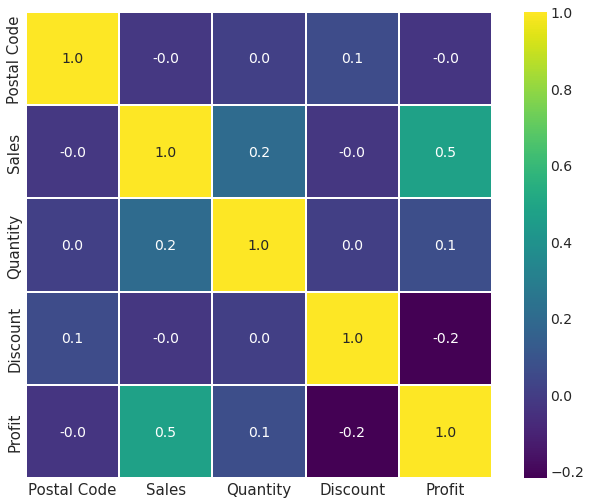

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(store.corr(), annot=True, cmap='viridis', fmt='.1f', linewidth=1, square=True)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

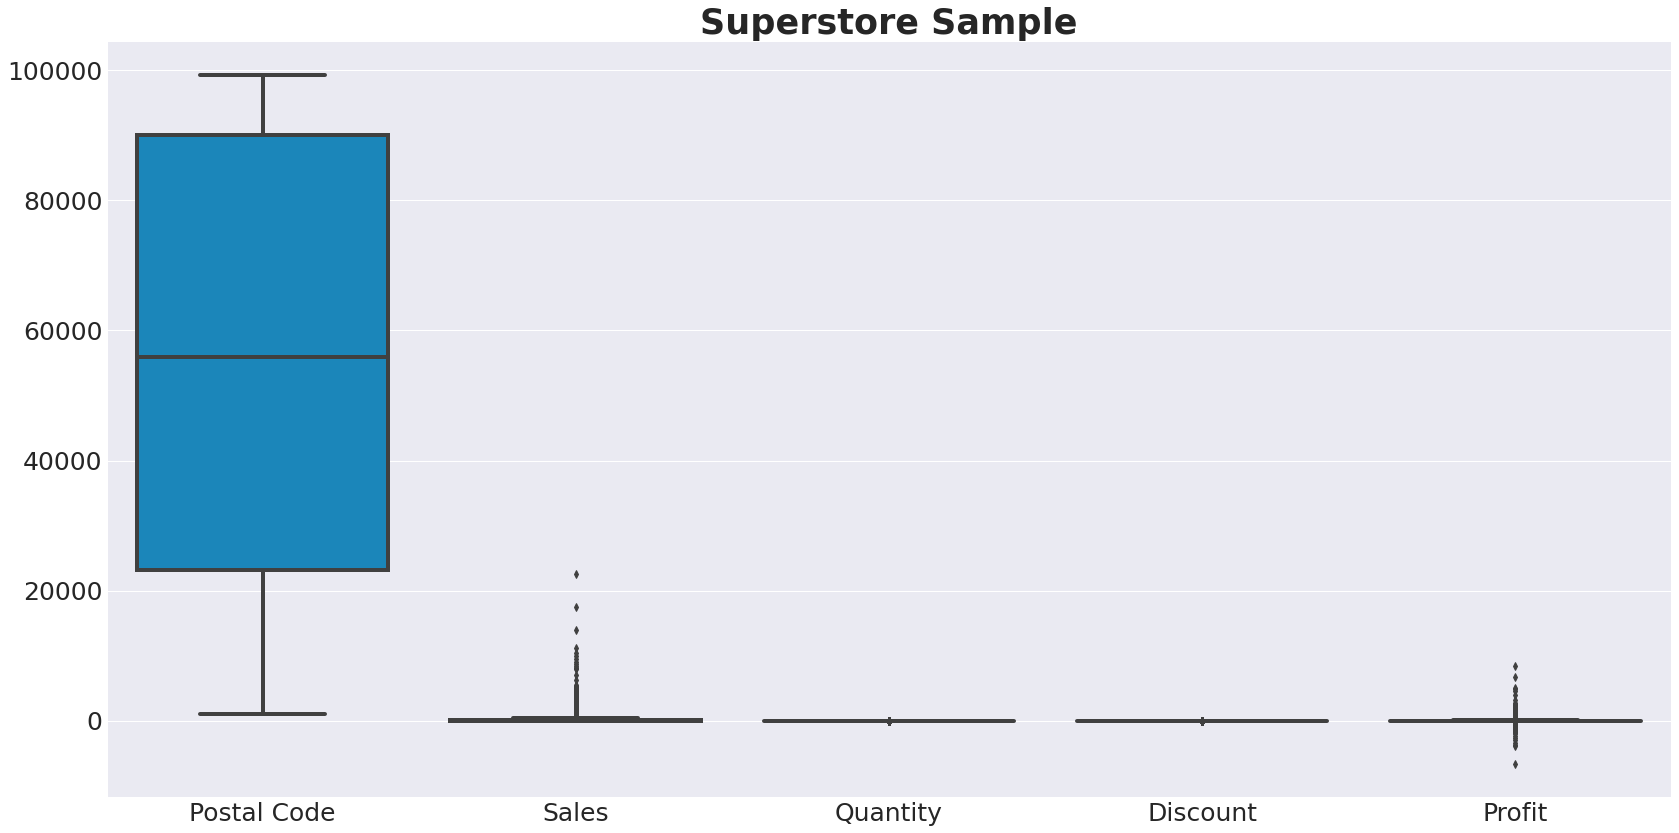

In [39]:
plt.figure(figsize=(25,13))
sns.boxplot(data=store)

plt.title("Superstore Sample", fontsize=35, fontweight='bold')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()

In [40]:
store[['Sales','Quantity','Profit']].groupby(['Profit'],as_index=True).sum().sort_values(by='Quantity',ascending=True)

,Sales,Quantity
Profit,,
43.7842,150.980,1
-0.8886,35.544,1
-0.8558,1.167,1
8.5914,19.980,1
-0.8120,12.992,1
...,...,...
6.2208,544.320,84
5.4432,466.560,90
9.3312,699.840,108


In [41]:
store[['Sales', 'Discount']].groupby(['Sales'], as_index=True).sum().sort_values(by='Discount', ascending=False)

,Discount
Sales,
15.552,7.4
10.368,7.0
20.736,3.8
2.946,3.6
3.168,3.4
...,...
101.700,0.0
101.880,0.0
101.940,0.0


In [42]:

store.groupby(["Category", "Sub-Category"], as_index=False)["Quantity"].count()

,Category,Sub-Category,Quantity
0,Furniture,Bookcases,228
1,Furniture,Chairs,615
2,Furniture,Furnishings,956
3,Furniture,Tables,319
4,Office Supplies,Appliances,466
5,Office Supplies,Art,795
6,Office Supplies,Binders,1522
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217
9,Office Supplies,Labels,363


In [43]:

store.groupby("Category", sort=False)["Sub-Category"].count()

Category
Furniture          2118
Office Supplies    6012
Technology         1847
Name: Sub-Category, dtype: int64

In [44]:
store['Ship Mode'].nunique()

4

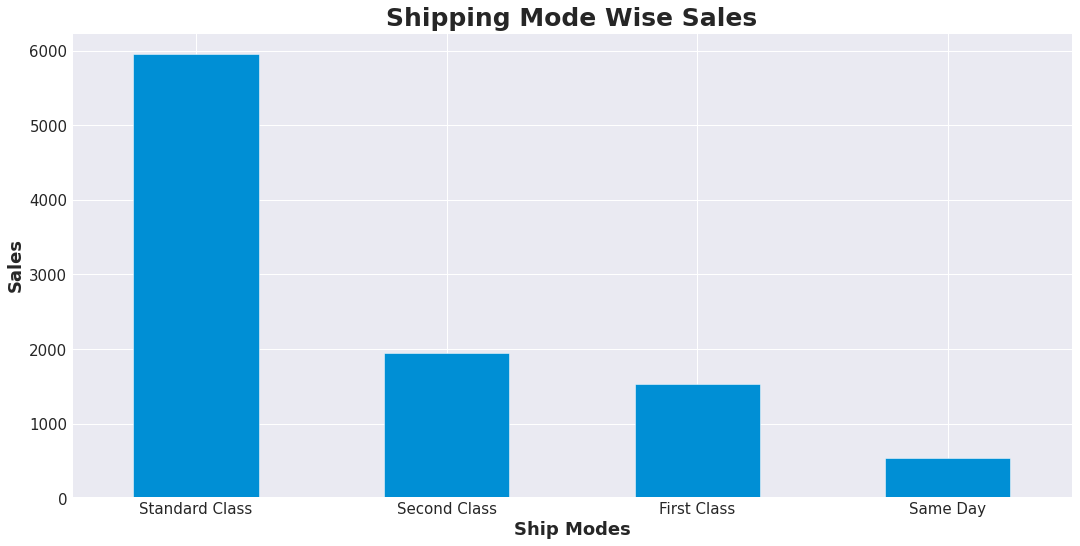

In [45]:

# Shipping Mode wise sales
plt.figure(figsize=(16,8))
store['Ship Mode'].value_counts().plot.bar()

plt.title('Shipping Mode Wise Sales', fontsize=25, fontweight='bold')

plt.ylabel('Sales', fontsize=18, fontweight='bold')
plt.xlabel('Ship Modes', fontsize=18, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# Standard Class shipping method is the highest which is 12 times higher than same day. 
# if they decrease the price of the other shipping method that could increase the customer satisfaction

In [46]:
store['Segment'].nunique()

3

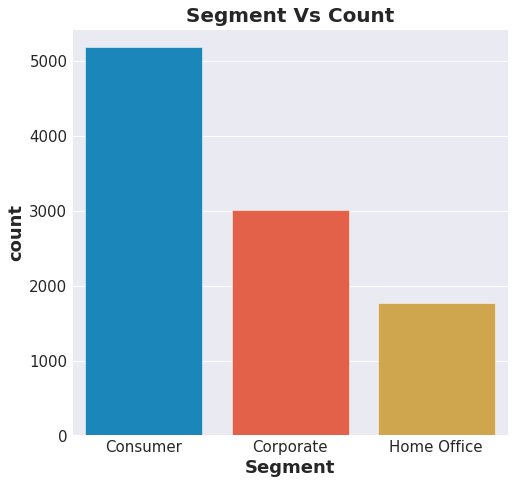

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


In [47]:
plt.figure(figsize=(7,7))
sns.countplot(store['Segment'])

plt.xlabel('Segment', fontsize=18, fontweight='bold')
plt.ylabel('count', fontsize=18, fontweight='bold')

plt.title('Segment Vs Count', fontsize=20, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.show()

print(store['Segment'].value_counts())

Consumers are the biggest buyers then corportes and then Home office

Company should try to bring more schemes for the consumers

to improve the corporate sales, they can bring sorporate level schemes

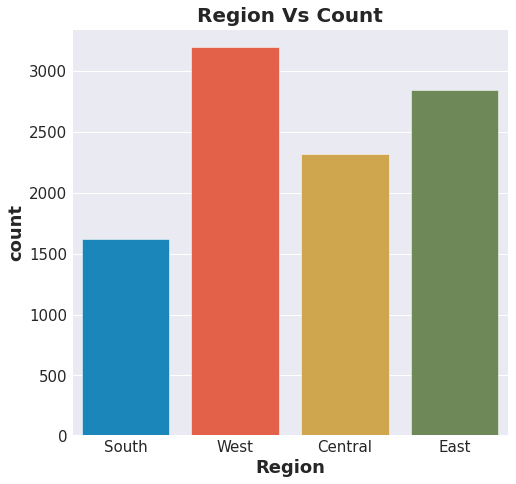

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


In [48]:
store['Region'].nunique()
plt.figure(figsize=(7,7))
sns.countplot(store['Region'])

plt.xlabel('Region', fontsize=18, fontweight='bold')
plt.ylabel('count', fontsize=18, fontweight='bold')

plt.title('Region Vs Count', fontsize=20, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.show()

print(store['Region'].value_counts())

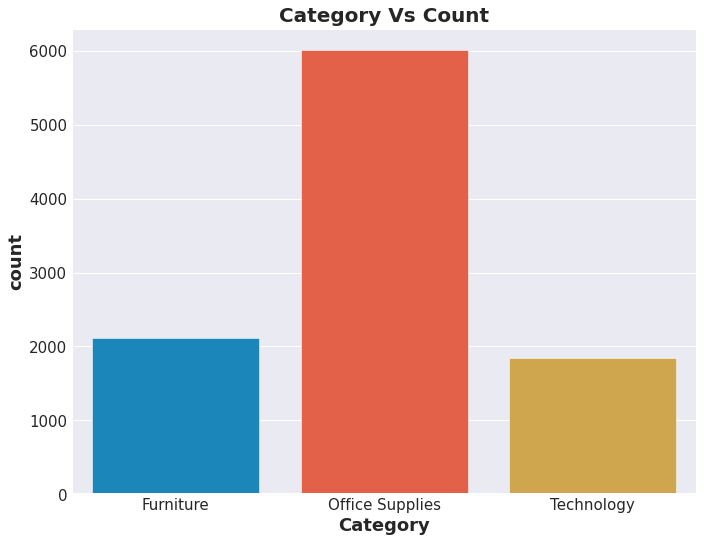

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


In [49]:
store['Category'].nunique()
plt.figure(figsize=(10,8))
sns.countplot(store['Category'])

plt.xlabel('Category', fontsize=18, fontweight='bold')
plt.ylabel('count', fontsize=18, fontweight='bold')

plt.title('Category Vs Count', fontsize=20, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.show()

print(store['Category'].value_counts())

In [50]:
store['Sub-Category'].nunique()

17

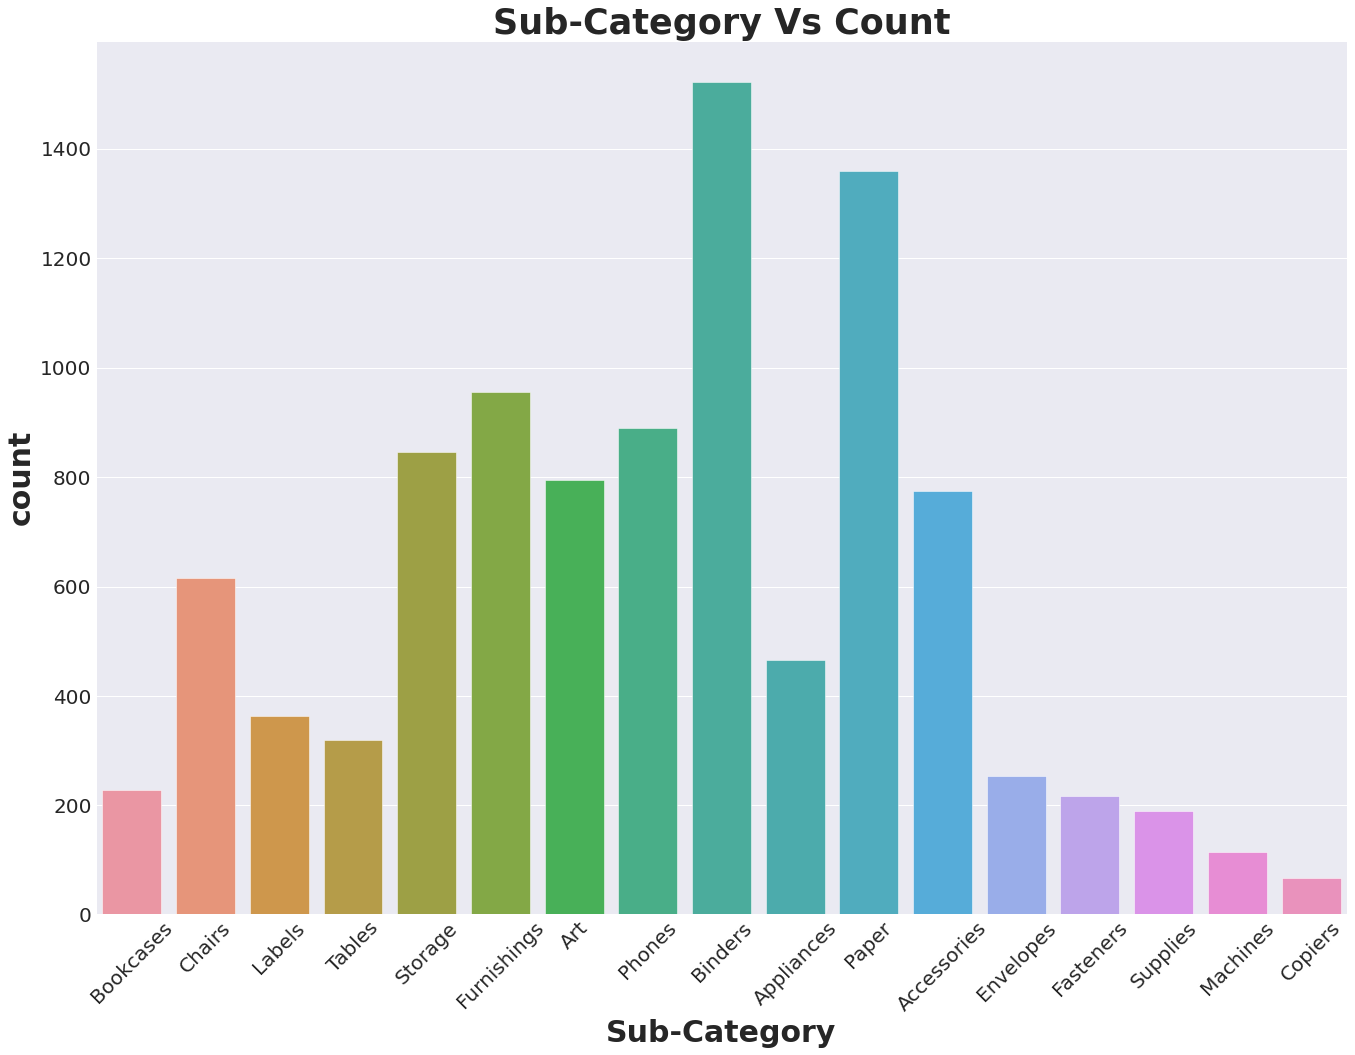

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


In [51]:

plt.figure(figsize=(20,15))
sns.countplot(store['Sub-Category'])

plt.xlabel('Sub-Category', fontsize=30, fontweight='bold')
plt.ylabel('count', fontsize=30, fontweight='bold')

plt.title('Sub-Category Vs Count', fontsize=35, fontweight='bold')

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

print(store['Sub-Category'].value_counts())

In [52]:
store['Country'].nunique()

1

In [53]:
store['City'].nunique()

531

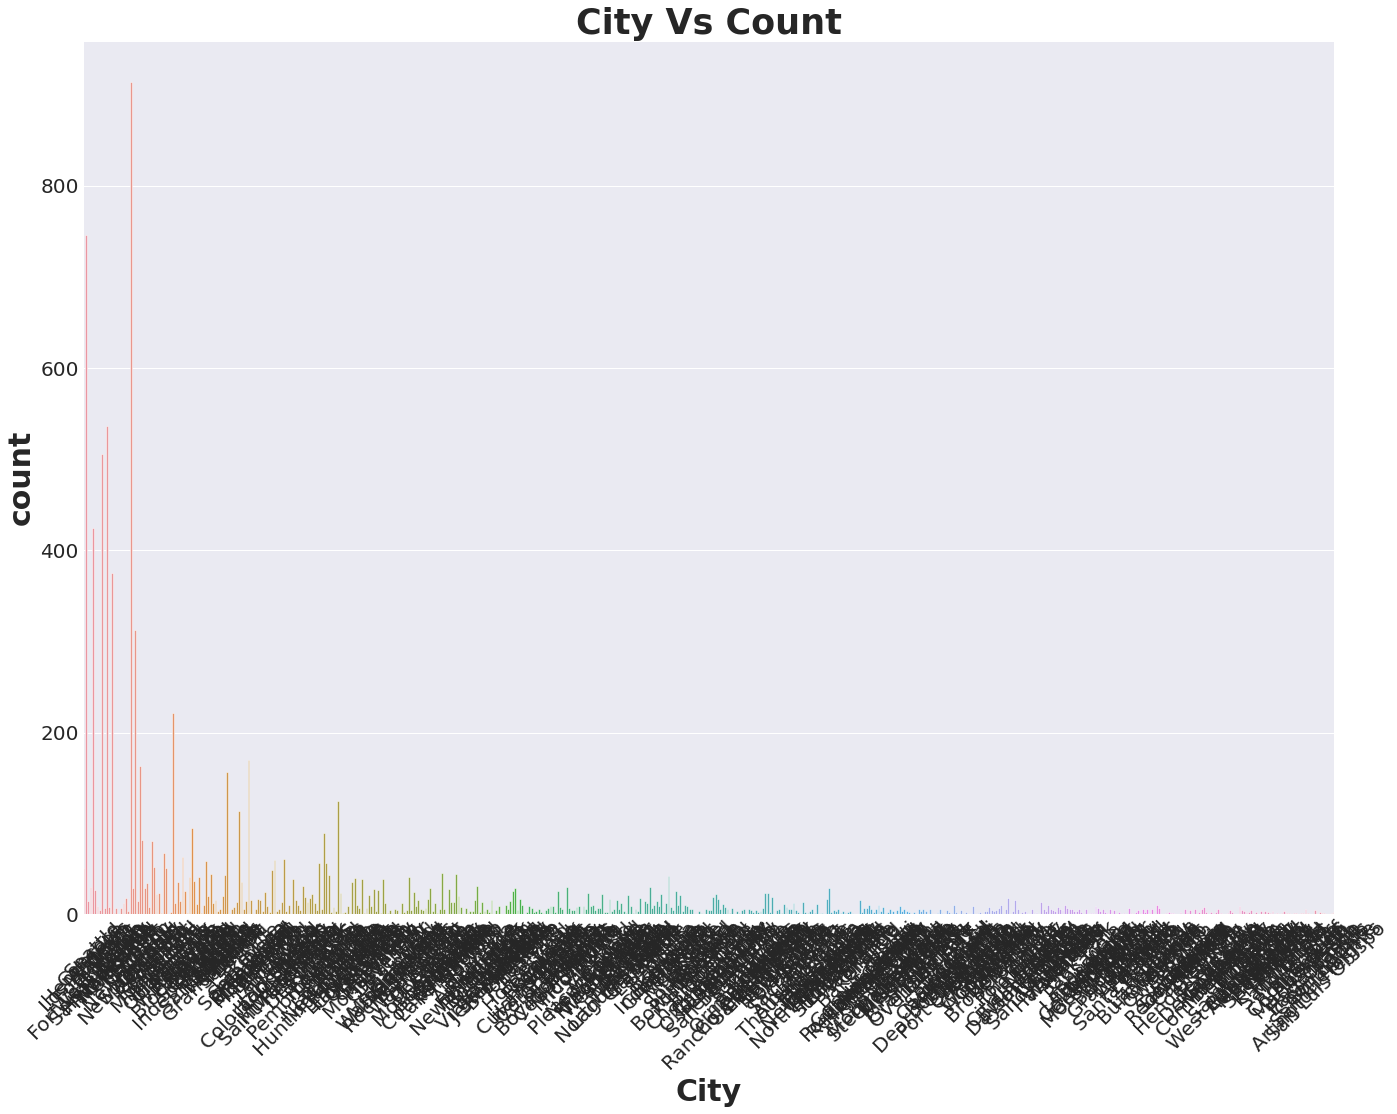

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Santa Maria        1
Rock Hill          1
Palatine           1
Abilene            1
Ormond Beach       1
Name: City, Length: 531, dtype: int64


In [54]:
plt.figure(figsize=(20,15))
sns.countplot(store['City'])

plt.xlabel('City', fontsize=30, fontweight='bold')
plt.ylabel('count', fontsize=30, fontweight='bold')

plt.title('City Vs Count', fontsize=35, fontweight='bold')

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

print(store['City'].value_counts())

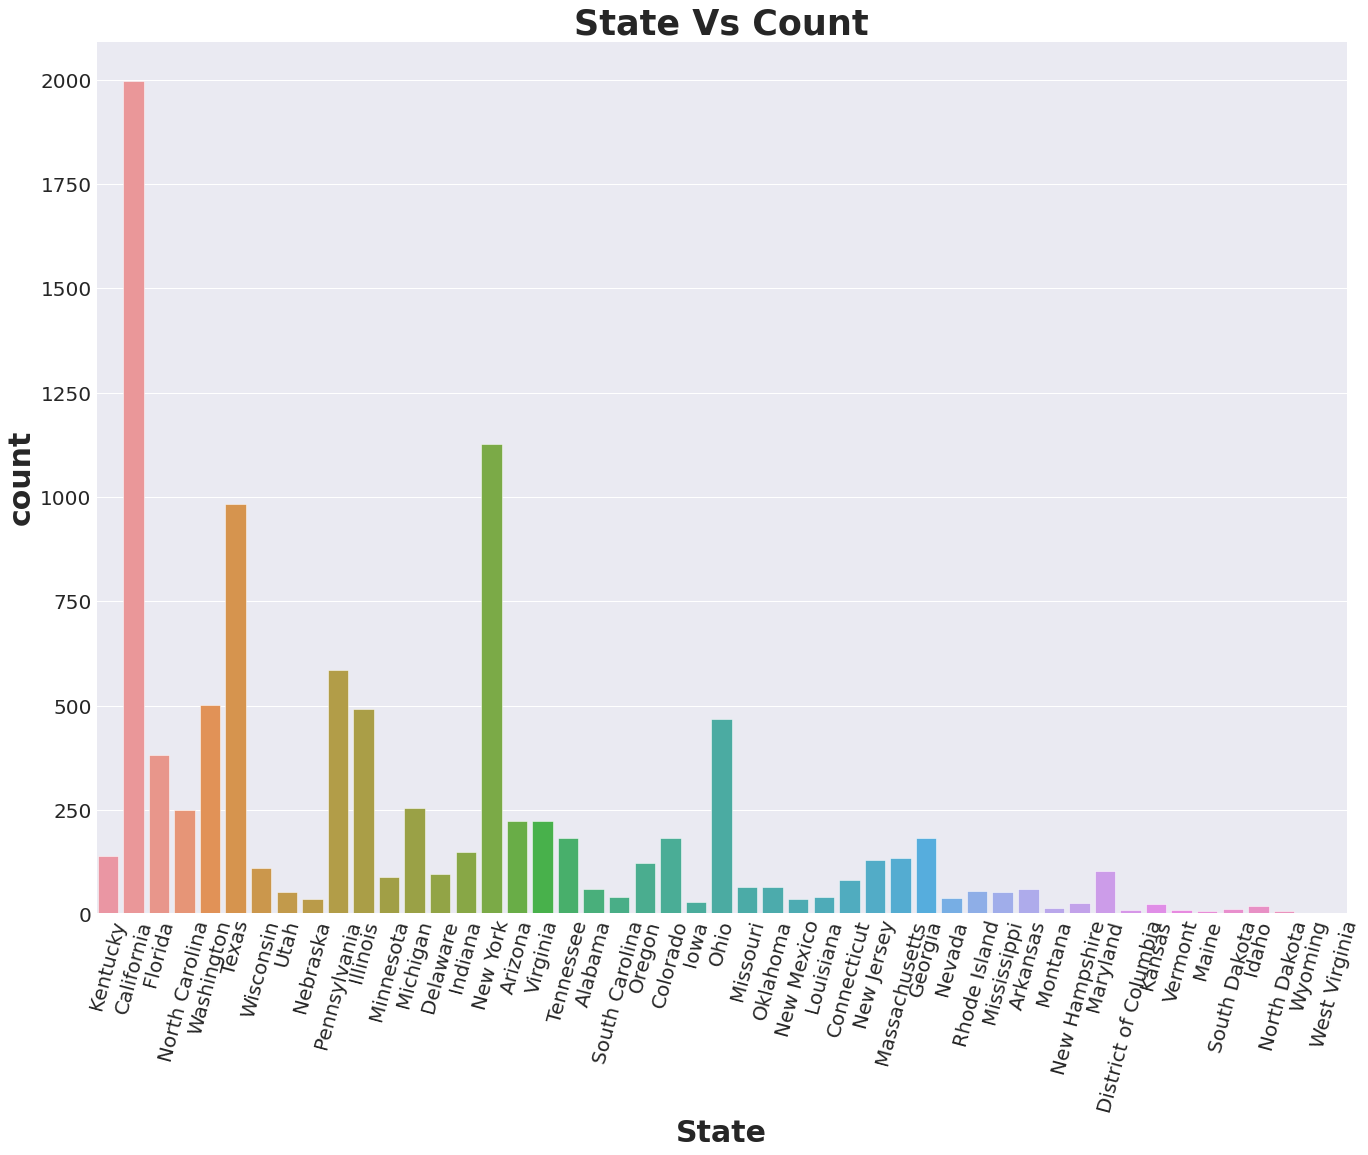

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [55]:
store['State'].nunique()

plt.figure(figsize=(20,15))
sns.countplot(store['State'])

plt.xlabel('State', fontsize=30, fontweight='bold')
plt.ylabel('count', fontsize=30, fontweight='bold')

plt.title('State Vs Count', fontsize=35, fontweight='bold')

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

print(store['State'].value_counts())

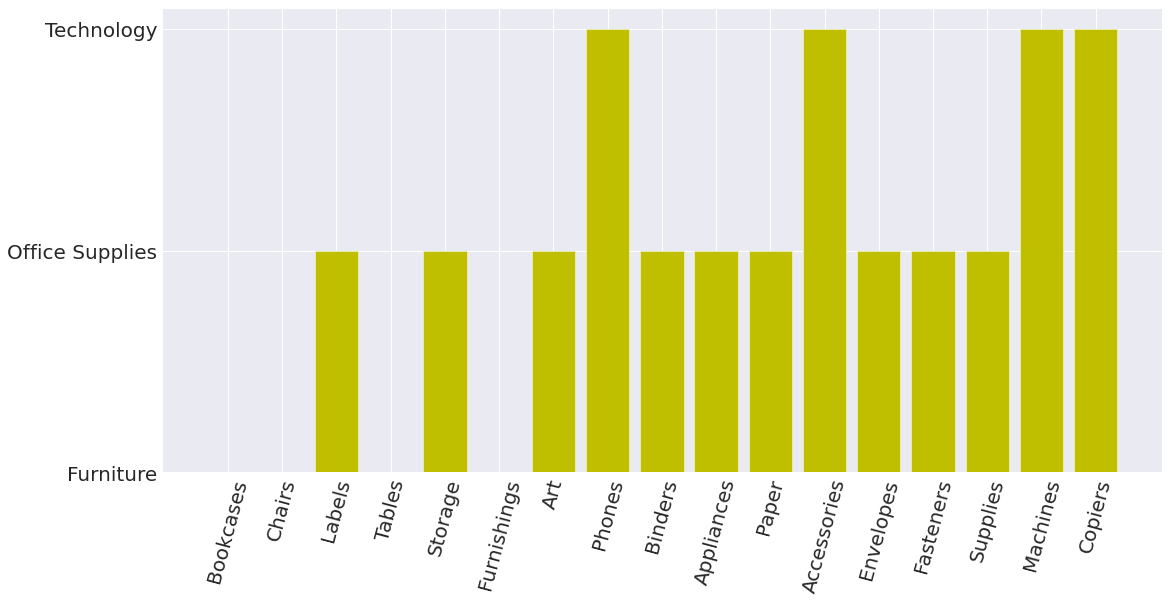

In [56]:
# Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=store, color='y')

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

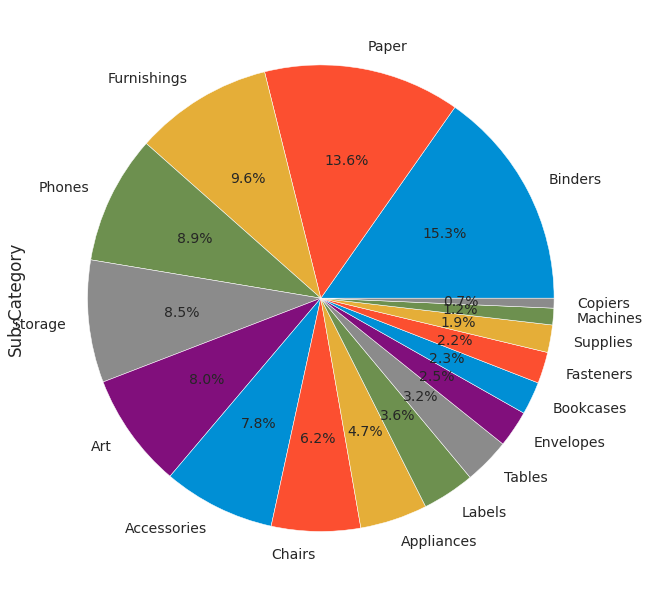

In [57]:
plt.figure(figsize=(12,10))
store['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<Figure size 864x720 with 0 Axes>

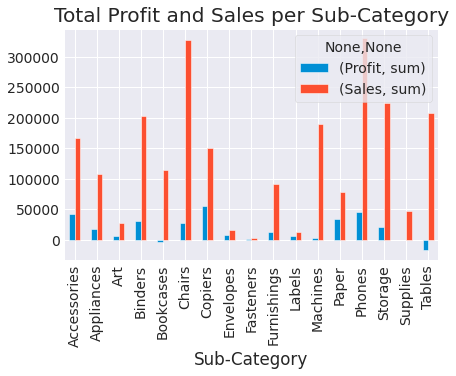

In [58]:
plt.figure(figsize=(12,10))
store.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')

plt.show()

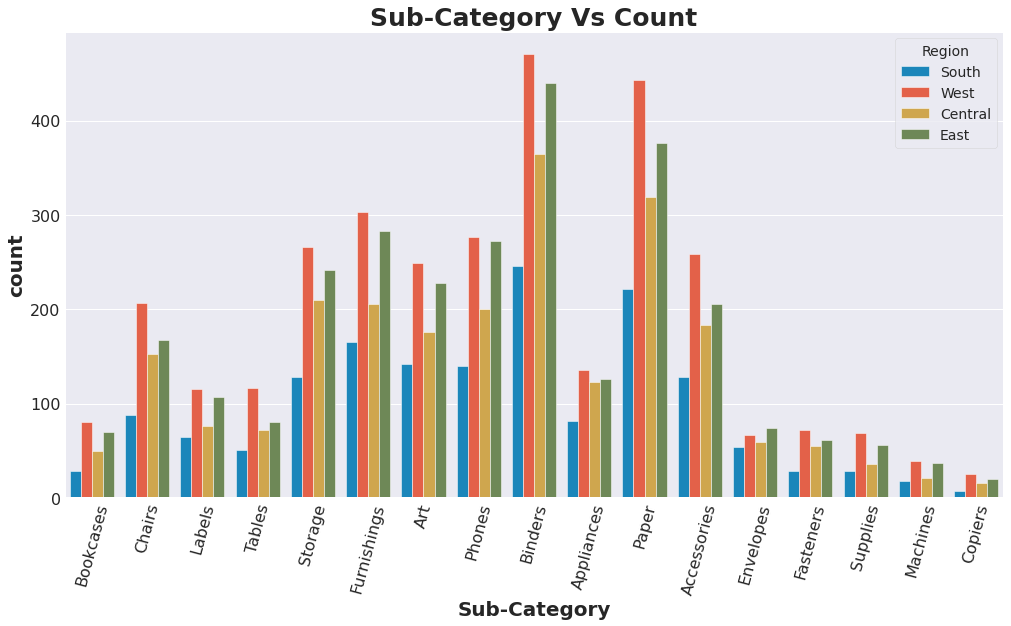

In [59]:
# Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=store)

plt.xlabel('Sub-Category', fontsize=20, fontweight='bold')
plt.ylabel('count', fontsize=20, fontweight='bold')

plt.title('Sub-Category Vs Count', fontsize=25, fontweight='bold')

plt.xticks(rotation=75, fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<Figure size 1296x864 with 0 Axes>

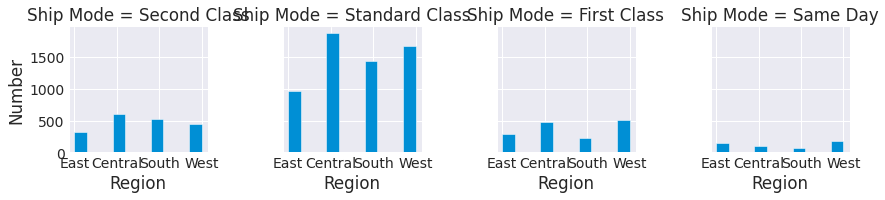

In [60]:
# Let's try to visualize the 'Region' column from the Shipmode column dataset standpoints.
plt.figure(figsize=(18,12))
region_hist = sns.FacetGrid(store, col='Ship Mode', palette='rainbow')
region_hist.map(plt.hist, 'Region')
region_hist.set_ylabels('Number')
plt.show()

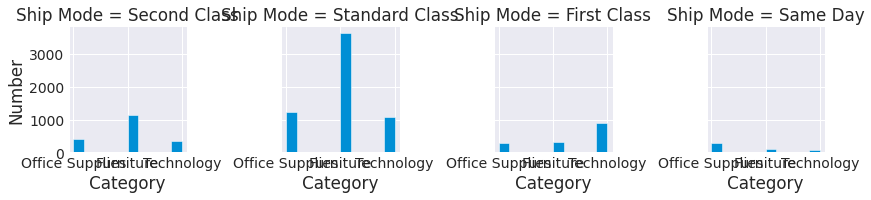

In [61]:
# Let's try to visualize the 'Category' column from the Shipmode column dataset standpoints.

category_hist = sns.FacetGrid(store, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')
category_hist.set_ylabels('Number')

In [64]:
d = []
for i in store['Sub-Category'].unique():
    sales = round(store[store['Sub-Category']==i]['Sales'].sum(),2)
    profit = round(store[store['Sub-Category']==i]['Profit'].sum(),2)
    d.append([i,sales,profit])
temp = pd.DataFrame(d,columns=['Sub-Category','Sales','Profit'])
temp = temp.sort_values('Sales',ascending=True)

fig = go.Figure(data=[go.Bar(name='Sales',x=temp['Sales'],y=temp['Sub-Category'],orientation='h',marker_color = 'green'),
                      go.Bar(name='Profit',x=temp['Profit'],y=temp['Sub-Category'],orientation='h',marker_color = 'navy')])
fig.update_layout(template='simple_white',title='Sales & Profit of each Sub-Category',height=700) #barmode='stack'
fig.show()

Text(0.5, 1.0, 'Region wise Sales')

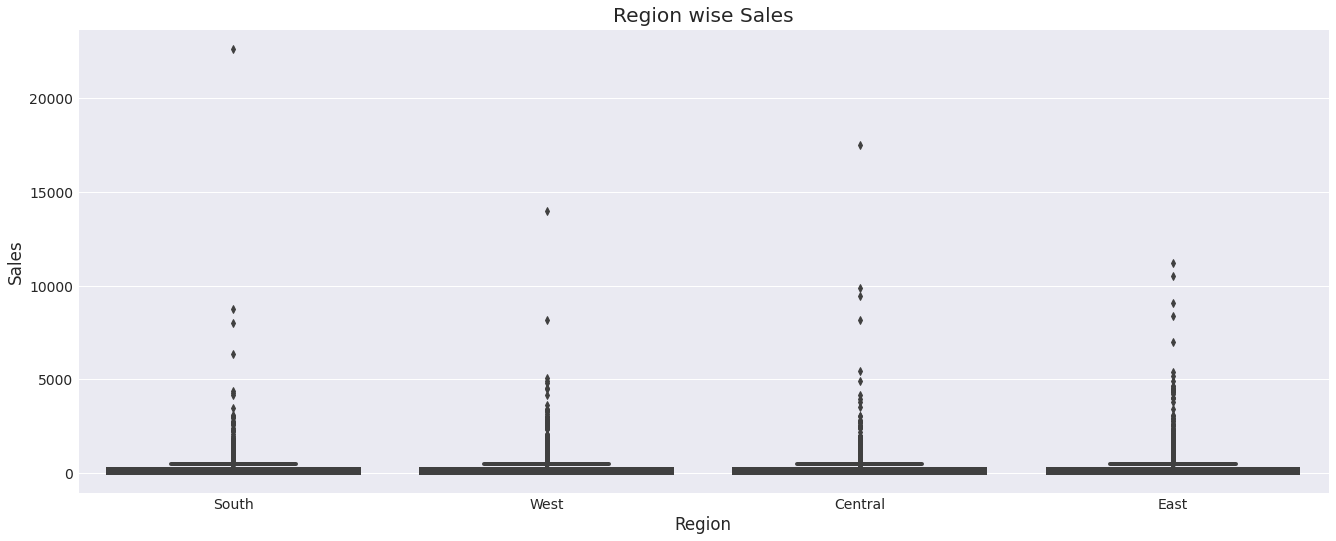

In [65]:
plt.figure(figsize=(20,8))
sns.boxplot("Region", "Sales", data=store)
plt.title('Region wise Sales')

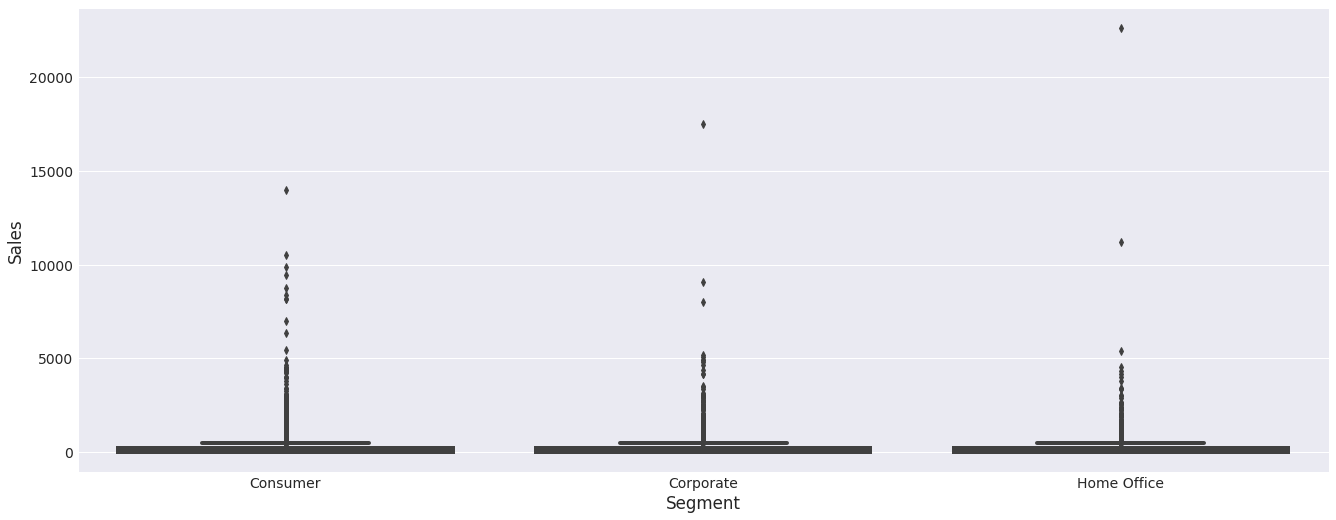

In [66]:
plt.figure(figsize=(20,8))
sns.boxplot('Segment', 'Sales', data=store)

Text(0.5, 1.0, 'Category Wise Sales')

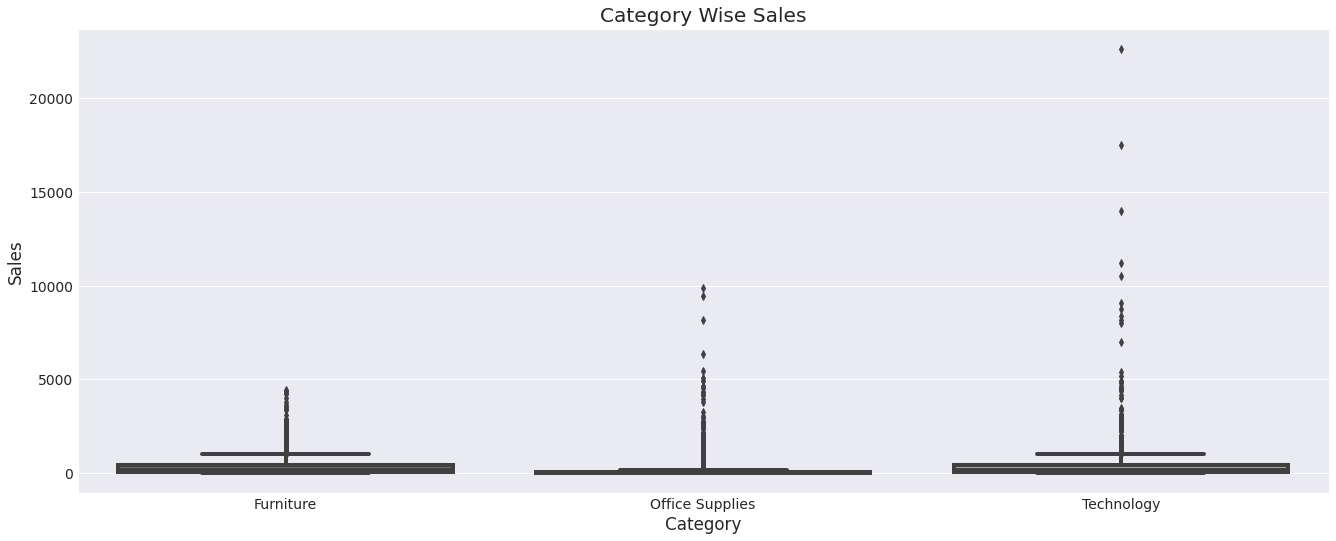

In [67]:
plt.figure(figsize=(20,8))
sns.boxplot("Category","Sales",data= store)
plt.title('Category Wise Sales')

Text(0.5, 1.0, 'Sales of sub category products')

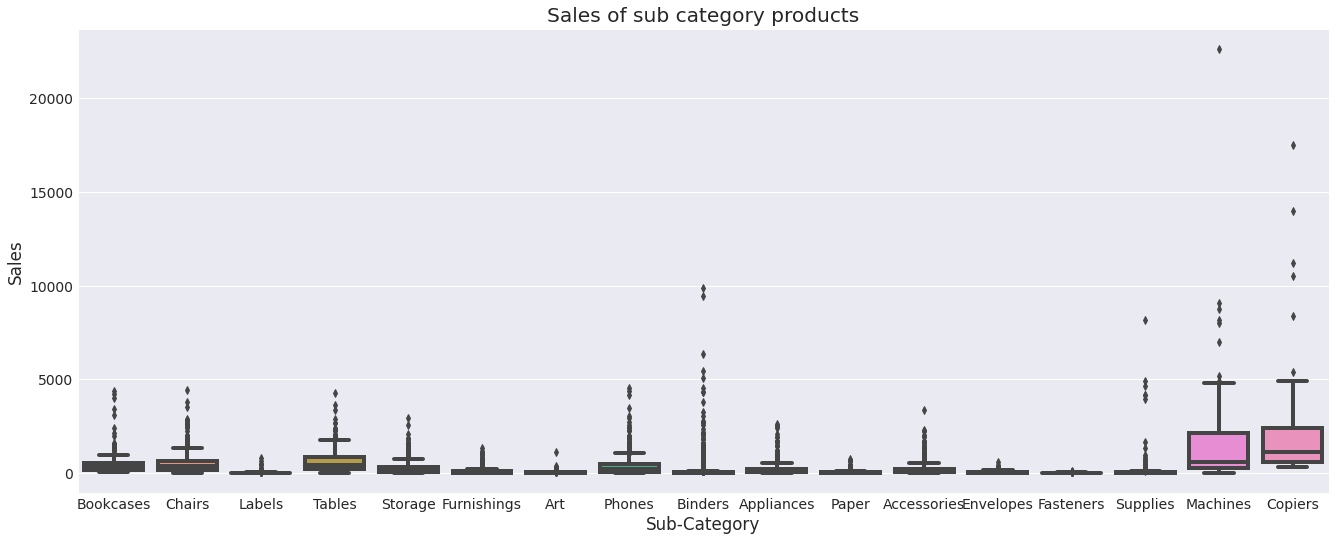

In [69]:

plt.figure(figsize=(20,8))
sns.boxplot("Sub-Category","Sales",data= store)
plt.title('Sales of sub category products')

Text(0.5, 1.0, 'Country Wise Sales')

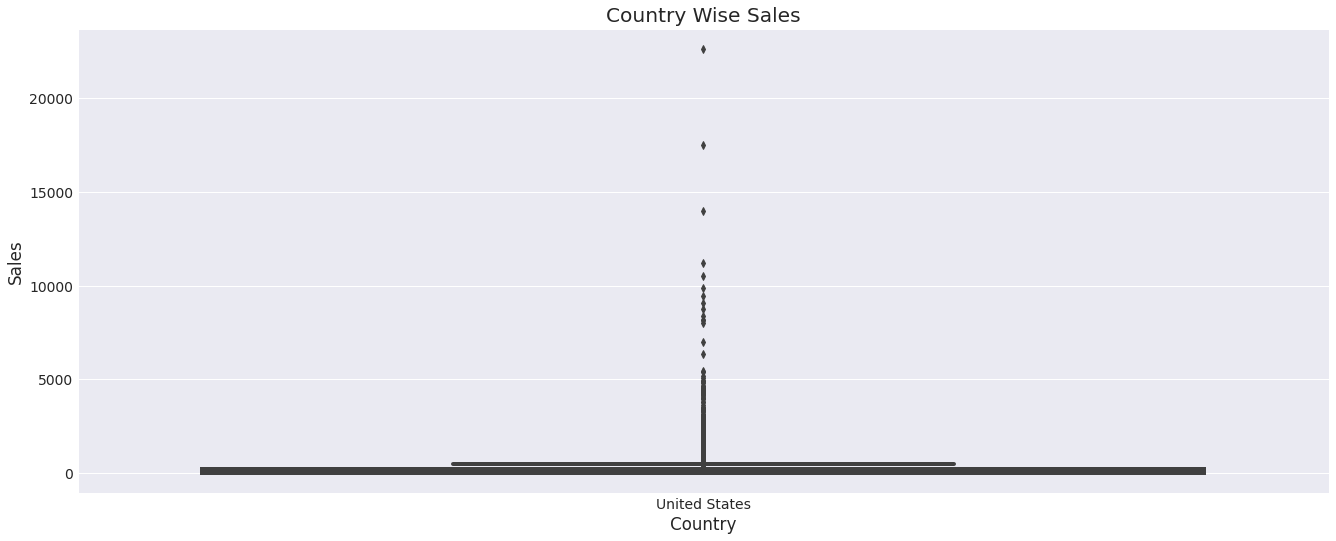

In [70]:
plt.figure(figsize=(20,8))
sns.boxplot("Country","Sales",data= store)
plt.title('Country Wise Sales')

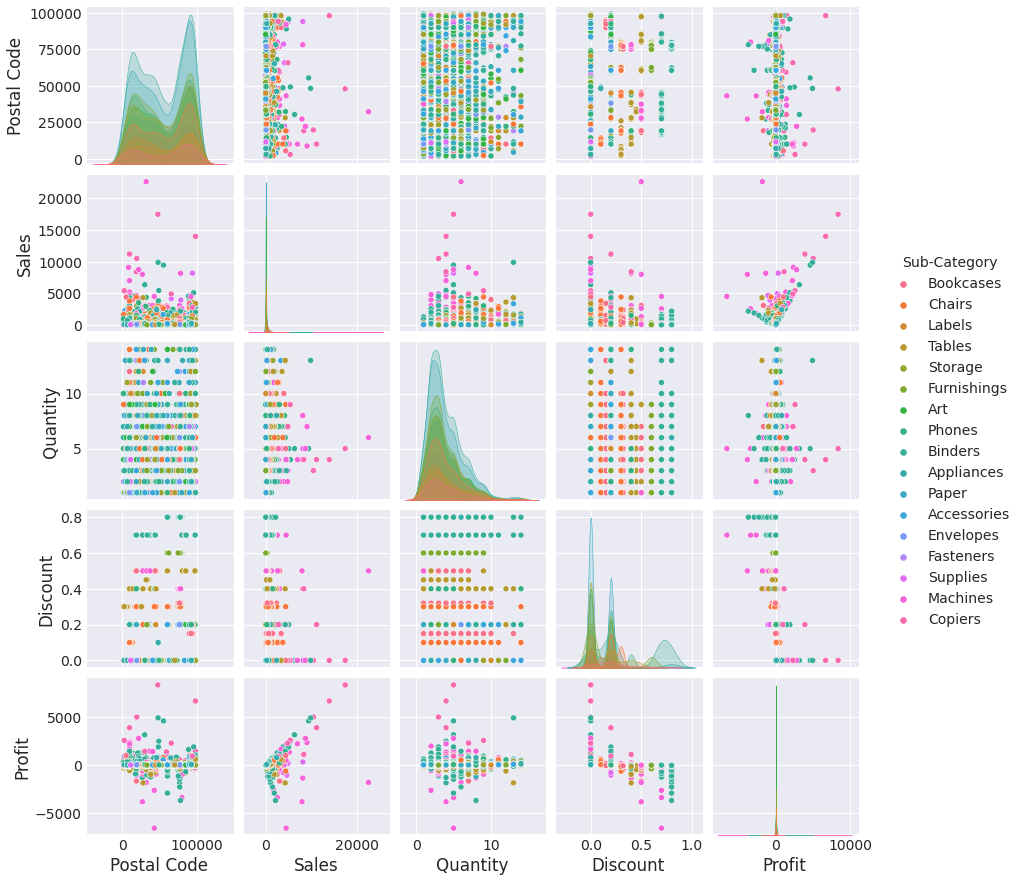

In [71]:
state_data = store[['Sales', 'Profit', 'Postal Code']].groupby(['Postal Code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

figsize=(15,10)
sns.pairplot(store, hue='Sub-Category')